# Linear Regression: Extra Reading and Challenges

## Learning Objectives
- A stronger introduction to sklearn
- Solving a 1-dimensional dataset
- Plotting the regression line
- Solving a more complicated dataset

In the previous notebooks, you have been introduced to something known as *simple* linear regression (SLR) and *gradient based optimization*. SLR is used to refer to a type of linear regression which solves datasets with only 1 *dimension*. What does this mean?

Recall that we are working with data, and are trying to build a *model* which predicts an output given an input. For example, we might want to predict someones salary based of their years of experience. Here, the thing we are trying to predict (i.e. the salary), is known as a *target* or *response* variable. The variables we'll be using to predict our response variable (i.e. years of experience) are known as the *feature* variables. A *dimension* in the context of machine learning refers to the number of features our dataset contains. In the previous example, we only had 1-dimension (because the number of features was 1). However, if we had a dataset which was trying to predict salary given years of experience, job title and job location, we would be working with a 3-dimensional dataset.

In this notebook, we aim to introduce to provide you a slightly more rigorous introduction to [*scikit-learn*](https://scikit-learn.org/) (otherwise known as sklearn). sklearn is the go-to library for traditional machine learning algorithms. With a specific focus on linear regression, we'll introduce you to the general syntax you can expect when using sklearn. We'll then load in a 1-d dataset which we can use sklearn to solve. Subsequently, we'll visualise the regression line for this dataset, and then load in a slightly more complicated dataset and run a linear regression algorithm on that. Let's get started!!

## sklearn

If you've worked through the previous notebooks, you already will have sklearn and numpy installed. To validate this is the case, run the following code cell. If the code cell runs without any errors then you're good to go 👍

In [1]:
import sklearn
import numpy as np

print("If you see this, the libraries have been imported sucessfully!")

If you see this, the libraries have been imported sucessfully!


If the above cell threw an error, you'll need to install the libraries. This can be done through something known as `pip`. Open up a terminal and type `pip install numpy sklearn`. If you've run that and re-run the above code cell and it's still throwing errors, replace the `pip` part of the above command with `pip3`. If that still doesn't work, you may not have pip installed and should perhaps google around or ask someone for help on how to install it.

Ok, now that we have the libraries imported, I'm going to introduce the general syntax of sklearn machine learning algorithms! The API (in this context, think of API meaning 'the code provided by the library which we're going use') is very easy to use and generally uniform across everything the library offers. However, this library is *vast* so we'll focus specifically on linear regression as a way to get your foot in the door.

Because of how big the library is, programmers won't typically import the whole sklearn package as we did earlier. We usually just import the specific sub-module we need. In this case, this will just be the `linear_model` module:
```python
from sklearn import linear_model
```

Pretty much all sklearn algorithms work in the same we - before we use the algorithm of our choice (linear regression in this case), we need to *instantiate* the algorithm *class*. If you've not come across terms instantiate or object before, please familiarise yourself with [this quick introduction](https://www.datacamp.com/community/tutorials/python-oop-tutorial). We instantiate the object as follows:
```python
lr_model = linear_model.LinearRegression()
```

This means that from the `linear_model` module, we're going to create a `LinearRegression()` object. All algorithm objects will have *methods/functions* specific to the algorithm we've instantiated. We typically find ourselves using the following two methods across all different sklearn objects though: `.fit()` and `.predict()`. The former, `fit()`, will train our model on data we provide it. The latter, `predict()`, will be run AFTER we've trained our model, and as the name implies, will be used to make some predictions from some data we provide it. At a very very very general level, the flow of a machine learning program would then be as follows:
```
from sklearn import <ALGORITHM MODULE>

train_data = <LOAD AND TRANSFORM TRAIN_DATA>
test_data = <LOAD AND TRANSFORM TEST_DATA>

model = <INSTANTIATE ALGORITHM CLASS>

model.fit(train_data)
predictions = model.predict(test_data)

model_score = <EVALUATE PREDICITONS OF TEST_DATA>
```

We'll talk about the data and evaluation in a minute. First, let's replace the above psuedo-code with stuff we already know about:
```python
from sklearn import linear_model

# We still need to talk about the actual data, but for now we'll assume we have some data ready-to-go...
train_data_features, train_data_target = ❓
test_data_features, test_data_target = ❓

lr_model = linear_model.LinearRegression()

lr_model.fit(train_data_features, train_data_target)
predictions = lr_model.predict(test_data_features, test_data_target)

# We will also talk about evaluation in a minute
score = ❓
```

Ok, so we have three things to talk about before we can run our first machine learning (ML) algorithms. Two of these are related to data (namely `train_data` and `test_data`), and the other about evaluation (`score`). Let's tackle data first.

There are two takeaways from the following paragraph(s) regarding data:
1. The process of training an ML algorithm
2. Using an ML algorithm in practise.

Typically, we want to build an ML algorithm to solve some real-world problems. This means that as new data comes in (for example, a new house coming on the market, an employee getting hired etc.), we want to make a prediction of this new piece of data (i.e. price of the new house, salary of the employee). As already covered, these predictions will be made from the features of the data.

To get an algorithm to the point where it can sucessfully *model* some data, we need to *train* it. Training refers to the process of feeding the algorithm a bunch of data so it can tune its internal parameters to 'understand'/fit the data - enabling it to make some good predictions. To understand how well our model/algorithm will work on new data as it comes in, we need to evaluate it on test data which the model has **NOT** seen during training. If the model was to be tested on data it was trained with, it would be susceptible to a real and common phenomenon known as [*overfitting*](https://www.youtube.com/watch?v=Anq4PgdASsc). This [Reddit post](https://www.reddit.com/r/artificial/comments/avdgzj/if_possible_eli5_what_is_overfitting_in_machine/ehe9gnj?utm_source=share&utm_medium=web2x&context=3) gives a great Explain Like I'm 5 explanation of overfitting:

*Overfitting would be like training your dog raise his paw when you hold out your hand, and he learns the trick perfectly, but he only does it when it's <u>you</u> holding out <u>your</u> hand, and only your right hand because that's all he's been trained on. He won't do it for anyone else, and he won't do it when you raise your left hand. So his "model" of the trick works perfectly, but because there hasn't been enough variation in the training activity, or because of the way that the training was done (or perhaps just because of the way the dog's brain works), his trick doesn't generalize correctly to other stimuli that was intended to yield the same result.*

So, when we train ML models, we are working with training data and testing data. Actually, we will also typically work with validation data, but that is out of scope for this tutorial. In most cases, we will split the data we have been given into a training and testing set. Typically we hold out 30% of our data for testing/validation, while the rest is used for training. Now we have (almost) enough knowledge from our code above to be updated:
```python
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# After loading in the data, we will need to process it to ensure it is in a format our algorithm can understand
full_dataset = load_data()
data_features, data_target = process_data(full_dataset)
train_data_features, test_data_features, train_data_target, test_data_target = train_test_split(data_features, data_target, test_size=0.3)

lr_model = linear_model.LinearRegression()

lr_model.fit(train_data_features, train_data_target)
predictions = lr_model.predict(test_data_features, test_data_target)

# Still need to cover this
score = ❓
```

Recent surveys amongst data scientists have revealled that about 80% of their time is spent on processing data for it to be used in an ML model. Whilst intuitive, there are a variety of things involved; however covering these things are out of scope for this tutorial. Thus, I will provide the `load_data` and `process_data` functions for you in the code cells which follow.

Before we actually get to coding, we need to cover one more thing: evaluation. It makes sense why we need to evaluate our models - if we didn't, we'd have no clue how well our model was actually performing. Before we send our model out into the real world, we need to ensure that the predictions it is making are of good enough quality.

There are a variety of different evaluation metrics across different types of problems. Perhaps the most intuitive of which is accuracy. However, because of the continuous nature of regression based problems, accuracy does not make sense. Instead, we will commonly find ourselves using the following two metrics: (Root) Mean Squared Error, and R^2. I will not cover exactly what R^2 is in this tutorial (you can find more info [here](https://www.youtube.com/watch?v=2AQKmw14mHM)) because understanding it is a bit more involved and will be a distraction from the point of this notebook. However, note the following about it: it is (generally) a value between 0 and 1 (or 0% to 100%) and determines how well the model fits the data. In this case, the higher the better.

I won't dive too much into the specifics of Mean Squared Error (MSE). It's more intuitive to understand though, and you can find more info about it [here](https://www.youtube.com/watch?v=XNgt7F6FqDU). It quantifies how wrong a prediction from a model was from the real value. The <u>squared error</u> part of MSE is obtained by squaring the difference between the actual and predicted value: $(y_i - \hat{y_i})^2$. $i$ refers to one individual sample from our test dataset, and we square the value so the obtained error is positive. The <u>mean</u> simply refers to the average over all of our of data. We thus arrive at the defintion for MSE:
$$
\frac{1}{n}\sum^{n}_{i=1}(y_i - \hat{y_i})^2
$$

where $n$ indicates the number of samples in our test data. Since this is an error metric, the *lower* the score the better (0 being the lowest error obtainable). Note that a good score for an MSE depends on range of the target itself. Because we've squared the data (to make the errors positive), we typically square-root the data to bring it back down to the same units as our original data. This metric is thus known as Root Mean Squared Error (RMSE). If we're trying to predict a movie rating out of 10, then an RMSE of 4.5 is pretty bad. It means that on average, our model prediction will be 4.5 stars off the actual movie rating. However, a 4.5 would be extremely good if we were trying to model house prices (which are in the magnitude of 100,000s). Then it would mean that, on average our model is only £4.50 off the actual house price.  

sklearn provides us with implementations for the common evaluation metrics so we don't need to implement them from scratch everytime we want to evaluate. Our code is now:

```python
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# After loading in the data, we will need to process it to ensure it is in a format our algorithm can understand
full_dataset = load_data()
data_features, data_target = process_data(full_dataset)
train_data_features, test_data_features, train_data_target, test_data_target = train_test_split(data_features, data_target, test_size=0.3)

lr_model = linear_model.LinearRegression()

lr_model.fit(train_data_features, train_data_target)
predictions = lr_model.predict(test_data_features, test_data_target)

# The "squared" flag here indicates whether we want to have the values returned to us in the squared variant (True by default) or not. We want the RMSE, and therefore we will provide squared as False
rmse_evaluation = mean_squared_error(test_data_target, predictions, squared=False)
print("RMSE Score", rmse_evaluation)

r2_evaluation = r2_score(test_data_target, predictions)
print("R2 Score", r2_evaluation)
```

As previously mentioned, I will load in the data for you and your job will be to build and evaluate a linear regression model to fit the data. Right now, I'm going to be generating toy data for us to work with so don't worry about the code here - later in this notebook we'll work with some real data. Let's think of this data as Years of Experience vs Salary

In [15]:
import matplotlib.pyplot as plt # plotting purposes

# This code just creates us some dummy data. Don't worry too much about it as it isn't the topic of the task
def load_data():
    np.random.seed(1)

    num_samples = 300
    num_variables = 2
    cov = [[0.3, 0.2], [0.2, 0.2]]

    L = np.linalg.cholesky(cov)
    uncorrelated = np.random.standard_normal((num_variables, num_samples))
    mean = [1, 1]
    correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(2, 1)
    correlated[0, :] = (correlated[0, :] + 1.2) * 15
    correlated[1, :] = (correlated[1, :] + 0.6) * 25000
    
    return correlated


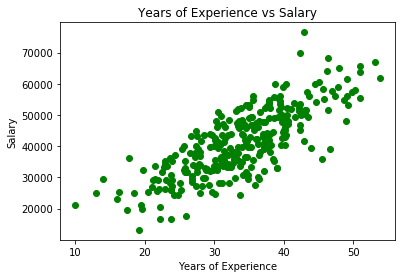

In [20]:
# Calling the function and visualsing the data we're working with
data = load_data()
plt.scatter(data[0], data[1], c='green')
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [25]:
# This tutorial is not about data cleaning or processing, 
# so all this code does here is return us our target and features as different variables 
def process_data(data):
    # data[0] = feature, data[1] = response
    return data[0].reshape(-1, 1), data[1]

data_features, data_target = process_data(data)

## Solving a 1-d dataset

Great! Now you have all the required information you need to code up your linear regression algorithm! Fill out the code cell below to do so. The RMSE I've obtained on this data ranges between 6000-7500, and the $R^2$ values I obtain seem to be in the 0.55 and 0.7 range

In [90]:
### Fit and evaluate a linear regression algorithm on this data!
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Split the data into train and test sets
train_data_features, test_data_features, train_data_target, test_data_target = ?

## Instantiate a linear model
lr_model = ?

## Fit the linear model


## Make predictions on your test data


rmse_evaluation = mean_squared_error(test_data_target, predictions, squared=False)
print("RMSE Score", rmse_evaluation)

r2_evaluation = r2_score(test_data_target, predictions)
print("R2 Score", r2_evaluation)

MSE Score 6219.235616280828
R2 Score 0.7064970995279382


## Plotting a regression line

With simple linear regression, we can plot a regression line to visualise how well our model is fitting the data:

Text(0, 0.5, 'Salary')

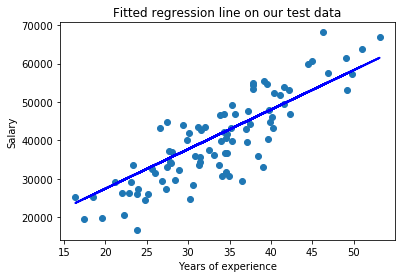

In [91]:
plt.scatter(test_data_features, test_data_target)
plt.plot(test_data_features, predictions, color="blue", linewidth=2)
plt.title("Fitted regression line on our test data")
plt.xlabel("Years of experience")
plt.ylabel("Salary")

Recall that a regression formula takes on the form: $\hat{y_i} = Wx_i + b$ (sometimes we will see W being denoted as $\beta$). With sklearn, we're able to obtain the W and b with the `.coef_` and `.intercept_` attributes of the linear regression object respectively:

In [93]:
W = lr_model.coef_
b = lr_model.intercept_

W, b

(array([1029.7720213]), 6798.347703010295)

The values I obtained are 1029 and 6798 respectively. The values you obtain will most likely be different.

These parameters form the basis of understanding how we can interpret what our model is doing. In this case, we're saying that $x$ is a year of experience. Let's say we have a new person join our company with 26 years of experience. We can apply the aforementioned LR formula to this person using the paramters we've just obtained, and manually work out what our model would predict for this person:

$$
\hat{y} = 1029 * 26 + 6798, \\
\hat{y} = 33552
$$

Let's validate this with our model!

In [96]:
# PURELY for teaching purposes I am explictly modifying the paramters of our fitted linear regression model. 
# This is just to show that with the parameter values I've given above, our model will make the expected prediction
# It is just an example so everyone reading this notebook is working with the same values
# You would probably never modify the parameters in practise

lr_model.coef_ = np.array([1029])
lr_model.intercept_ = 6798

new_data = np.array([26]).reshape(-1, 1)
lr_model.predict(new_data)

array([33552])

## Solving a more complicated dataset

Most data out there isn't 1-dimensional... (strictly speaking, we've actually worked with 2-dimensional data - because the target variable is part of the dataset too. However, as I have done here, you'll often come across people referring to dataset dimensionality as the number of features in the dataset). What do you think changes when working with 1-d data to something greater than 1-d data?

There are some slight mathematical changes when it comes to both the forward (i.e. the Linear Regression foruma) and backward pass (i.e. gradient descent) because we're working with vectors as opposed to scalars. However, as far as actual code implementation goes - very little changes. All the code we've wrote above will work as is, apart from the plots. When working with 2 feature variables, we can visualise a regression line in a 3-d plot (2 of the dimenions for the feature variables, 1 for the target). However, it is not straightforward to visualise a regression line if we are working with more than 2 features.

Here, I'll be using a toy dataset that sklearn provides. This dataset is on some data regarding diabetes. Essentially we are trying to model the progression of the disease 1 year after some baseline measurements were taken. We are given 10 features (age, sex, bmi etc.) and 442 samples. More info about the dataset can be found here: https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset.

As before, I will load in and "process" the data for you - your job here will be to fit a model, evaluate it, and also return the model coefficients. Please note that sklearn has already performed the relevant processing and transforming of the data (e.g. standardising the features). This is something **critical** you will need to do in real world datasets, but such is out of scope for this notebook.

In [99]:
from sklearn.datasets import load_diabetes
full_dataset = load_diabetes()
full_dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [101]:
def process_data(data):
    return data["data"], data["target"]

data_features, data_target = process_data(full_dataset)
data_features, data_target

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

It's time to fit and evaluate your LR model! The RMSE I've obtained is between 50 and 60, while the $R^2$ appears to be between 0.4 and 0.55. Armed with the knowledge that our response variable lies in the range of 25 and 346, do you think this model is fitting the data well?

In [169]:
### Fit and evaluate a linear regression algorithm on this data!

## Split the data into train and test sets
train_data_features, test_data_features, train_data_target, test_data_target = ?

## Instantiate a linear model
lr_model = ?

## Fit a linear model


## Make predictions on the test set


rmse_evaluation = mean_squared_error(test_data_target, predictions, squared=False)
print("RMSE Score", rmse_evaluation)

r2_evaluation = r2_score(test_data_target, predictions)
print("R2 Score", r2_evaluation)

MSE Score 54.22367768007242
R2 Score 0.4685439159581326


Let's return the model parameters now! When we did this for the 1-d data, we only saw 1 value returned for $W$ and 1 for $b$. Here, we see 10 values for $W$ and 1 for $b$. Can you think as to why $W$ now has 10 values?

In [173]:
## Return the model co-efficients and intercept.
W = ?
b = ?

W, b

(array([  72.21091467, -248.16130554,  521.23149858,  425.85643958,
        -941.02624592,  484.35729921,  310.70262176,  459.07455683,
         649.19967696,   73.64453466]), 154.23718851953655)